# Shark Tank

_Shark Tank_ is a reality TV show. Contestants present their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](http://abc.go.com/shows/shark-tank) to get a sense of how it works. You can also search for a clip on YouTube. 

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` methods (like `.sum()` and `.max()`) instead of writing a for loop over a `DataFrame` or `Series`
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

In [2]:
import pandas as pd

## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file `sharktank.csv`. Read in the data into a Pandas `DataFrame`.

In [3]:
shark_file = pd.read_csv('sharktank.csv')
print shark_file

     Season  No. in series                          Company Deal  \
0       1.0            1.0                 Ava the Elephant  Yes   
1       1.0            1.0            Mr. Tod's Pie Factory  Yes   
2       1.0            1.0                          Wispots   No   
3       1.0            1.0      College Foxes Packing Boxes   No   
4       1.0            1.0                        Ionic Ear   No   
5       1.0            2.0                   A Perfect Pear  Yes   
6       1.0            2.0                   Classroom Jams  Yes   
7       1.0            2.0                         Lifebelt   No   
8       1.0            2.0                      Crooked Jaw   No   
9       1.0            2.0               Sticky Note Holder   No   
10      1.0            3.0                      Turbobaster  Yes   
11      1.0            3.0                 Stress Free Kids  Yes   
12      1.0            3.0             Kwyzta Chopstick Art   No   
13      1.0            3.0  50 State Capitals in

There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [4]:
mask = shark_file.Corcoran != 1.0
shark = 'Corcoran'
shark_file.loc[mask, shark] = 0

mask = shark_file.Cuban != 1.0
shark = 'Cuban'
shark_file.loc[mask, shark] = 0

mask = shark_file.Greiner != 1.0
shark = 'Greiner'
shark_file.loc[mask, shark] = 0

mask = shark_file.Herjavec != 1.0
shark = 'Herjavec'
shark_file.loc[mask, shark] = 0

mask = shark_file.John != 1.0
shark = 'John'
shark_file.loc[mask, shark] = 0

mask = shark_file.iloc[:,14] != 1.0
shark = "O'Leary"
shark_file.loc[mask, shark] = 0

mask = shark_file.iloc[:,14] != 0.0
shark = "O'Leary"
shark_file.loc[mask, shark] = 1.0

mask = shark_file.Harrington != 1.0
shark = 'Harrington'
shark_file.loc[mask, shark] = 0

mask = shark_file.Guest != 1.0
shark = 'Guest'
shark_file.loc[mask, shark] = 0

In [5]:
print shark_file.head(5)

   Season  No. in series                      Company Deal           Industry  \
0     1.0            1.0             Ava the Elephant  Yes         Healthcare   
1     1.0            1.0        Mr. Tod's Pie Factory  Yes  Food and Beverage   
2     1.0            1.0                      Wispots   No  Business Services   
3     1.0            1.0  College Foxes Packing Boxes   No   Lifestyle / Home   
4     1.0            1.0                    Ionic Ear   No  Uncertain / Other   

  Entrepreneur Gender    Amount Equity  Corcoran  Cuban  Greiner  Herjavec  \
0              Female   $50,000    55%       1.0    0.0      0.0       0.0   
1                Male  $460,000    50%       1.0    0.0      0.0       0.0   
2                Male       NaN    NaN       0.0    0.0      0.0       0.0   
3                Male       NaN    NaN       0.0    0.0      0.0       0.0   
4                Male       NaN    NaN       0.0    0.0      0.0       0.0   

   John  O'Leary  Harrington  Guest Details 

Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

In [6]:
if(shark_file['Equity'].dtype == 'object'):
    shark_file['Equity'] = shark_file['Equity'].str.rstrip('%').astype('float') / 100.0

shark_file['Equity'].fillna(0.0, inplace=True)

if(shark_file['Amount'].dtype == 'object'):
    shark_file['Amount'] = shark_file['Amount'].replace('[\$,]', '', regex=True).astype(float)

shark_file['Amount'].fillna(0.0, inplace=True)
shark_file.head(5)

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,50000.0,0.55,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,460000.0,0.50,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN


## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \\$10,000 for a 40\% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \\$25,000 is \\$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

In [7]:
pd.set_option('use_inf_as_na', True)

shark_file['total_value'] = shark_file['Amount'] / shark_file['Equity']
print "Max company worth = " + str(shark_file['total_value'].max())
row_id = shark_file['total_value'].idxmax()
print shark_file.iloc[row_id]

print "\nMax Shark investment = " + str(shark_file['Amount'].max())
row_id = shark_file['Amount'].idxmax()
print shark_file.iloc[row_id]

Max company worth = 25000000.0
Season                                                                 6
No. in series                                                         11
Company                                                             Zipz
Deal                                                                 Yes
Industry                                               Food and Beverage
Entrepreneur Gender                                                 Male
Amount                                                           2.5e+06
Equity                                                               0.1
Corcoran                                                               0
Cuban                                                                  0
Greiner                                                                0
Herjavec                                                               0
John                                                                   0
O'Leary             

**No, the company that was worth the most is not the same as the company that has the largest investment.**

## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons?

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

In [8]:
mask = shark_file.Corcoran != 1.0
shark = 'Corcoran'
shark_file.loc[mask, shark] = 0

**YOUR EXPLANATION HERE**

## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate (the proportion of companies that were funded) for each industry. Make a visualization showing this information.

Total businesses funded : 249
Total Healthcare businesses funded : 10
4%
Total Food and Beverage businesses funded : 56
22%
Total Business Services businesses funded : 3
1%
Total Lifestyle / Home businesses funded : 37
14%
Total Uncertain / Other businesses funded : 5
2%
Total Children / Education businesses funded : 29
11%
Total Consumer Products businesses funded : 10
4%
Total Fashion / Beauty businesses funded : 43
17%
Total Media / Entertainment businesses funded : 6
2%
Total Software / Tech businesses funded : 15
6%
Total Fitness / Sports businesses funded : 23
9%
Total Pet Products businesses funded : 7
2%
Total Green/CleanTech businesses funded : 5
2%


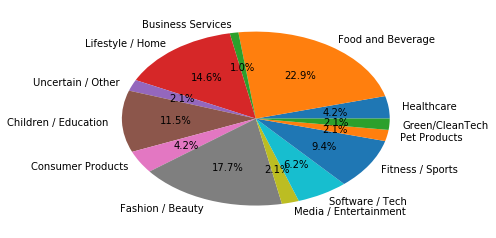

In [52]:
from __future__ import division
import matplotlib.pyplot as plt
import math

# From https://kodify.net/python/math/truncate-decimals
def truncate(number, decimals=0):
    """
    Returns a value truncated to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer.")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more.")
    elif decimals == 0:
        return math.trunc(number)

    factor = 10.0 ** decimals
    return math.trunc(number * factor) / factor


# Lists all unique industries
industries = shark_file['Industry'].unique()

# 249
funded_businesses = shark_file[(shark_file['Deal'] == "Yes")].index.tolist()
num_funded = len(funded_businesses)
print "Total businesses funded : " + str(num_funded)

y_axis = []
for industry in industries:
    total_funded = shark_file[(shark_file['Industry'] == industry) & (shark_file['Deal'] == "Yes")]
    num_total = len(total_funded)
    print "Total " + industry + " businesses funded : " + str(num_total)
    
    proportion = num_total / 249
    proportion = truncate(proportion, 2) * 100
    
    y_axis.append(proportion)
    
    proportion = str(proportion)
    proportion = proportion[:-2]
    proportion = proportion + "%"
    print proportion

plt.pie(y_axis, labels=industries, autopct='%1.1f%%')
plt.show()

**The Sharks seem to prefer the Food / Beverage industry.**

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.

2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)

3. Upload the PDF and Notebook (ipynb) to iLearn